In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import rebound

c1 = '#990099'
c2 = '#4d0099'
c3 = '#009900'

%matplotlib inline

# Ley de Titius Bode para el Sistema Solar

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Ceres'... Found: 1 Ceres (A801 AA).
Searching NASA Horizons for 'Jupiter'... 

/opt/anaconda3/lib/python3.7/site-packages/rebound/horizons.py:140: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


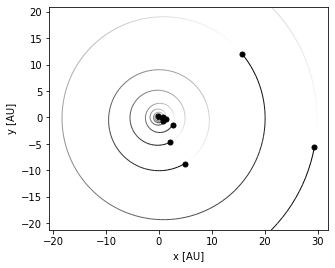

In [2]:
"""En este caso sólo usaremos REBOUND por el momento 
para obtener el semieje mayor de los objetos y graficar"""

# Declarando la simulación 

sim = rebound.Simulation()      
sim.units = ('AU', 'yr', 'Msun')
sim.integrator = "whfast" 

# Añadiendo objetos

Sol = ['Sun']
sim.add(Sol)
Objetos = ['Mercury','Venus','Earth','Mars','Ceres','Jupiter','Saturn','Uranus','Neptune']
sim.add(Objetos)

sim.move_to_com()

# Graficando

fig = rebound.OrbitPlot(sim, unitlabel="[AU]")
plt.savefig('orbit.pdf',bbox_inches='tight');

In [3]:
N = len(sim.particles)
print(N)

Numero  = []
Semieje = []

for i in range(1,N):
    Numero.append(i)                   # Añade la posición en el ciclo
    Semieje.append(sim.particles[i].a) # Añade el semieje mayor
    
print(Numero)
print(Semieje)

10
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.3870988390361439, 0.7233236668118019, 1.000010109858397, 1.5236554423617026, 2.7668970820324854, 5.203759982705121, 9.539730180326899, 19.192636529811907, 30.076057933880342]


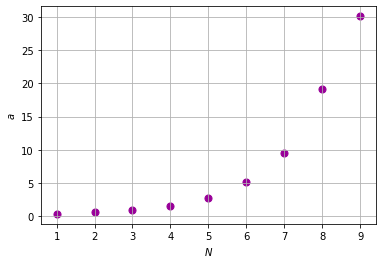

In [4]:
fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(Numero,Semieje, color = c1, s = 50)

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$a$');

In [5]:
"""Calculando el ajuste de la recta por mínimos cuadrados"""

n = len(Semieje)
i = 0
X, Y, XY, X2 = 0., 0., 0., 0.

for i in range(0,n):
    
    x = Numero[i]
    y = np.log(Semieje[i])
    
    X = X + x      # Suma de las x
    Y = Y + y      # Suma de las y
    XY = XY + x*y  # Suma de x*y
    X2 = X2 + x**2 # Suma de x^2

m = (n*XY - X*Y)/(n*X2 - X**2)    # Valor de la pendiente
b = ((X2*Y)-(XY*X))/(n*X2 - X**2) # Valor de la ordenada al origen

In [6]:
B = np.exp(b)
D = np.exp(m)

Numero_ajuste = np.linspace(0,n+1,100)
print(Numero_ajuste)

Semieje_ajuste = B * D**(Numero_ajuste)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

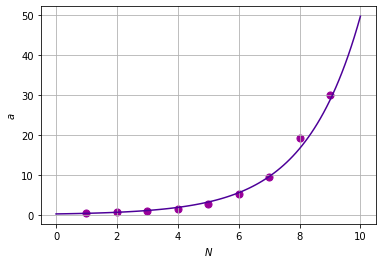

In [7]:
fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(Numero,Semieje, color = c1, s = 50)
ax.plot(Numero_ajuste,Semieje_ajuste, color = c2)

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$a$');

# Ley de Titius Bode para Exoplanetas

In [8]:
!ls

Explorando la ley de Titius Bode.ipynb orbit.pdf
TablaExoplanetas.dat


In [9]:
datos = np.genfromtxt('TablaExoplanetas.dat', names=True, dtype=None, delimiter = '\t')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [10]:
a = datos[1230]
print(a)

(b'K2-233 b', b'Confirmed', 0.0104, 0.0069, 0.009, nan, nan, nan, 0.11982, 0.00143, 0.00161, 2.4675, 4.e-05, 4.e-05, 0.03308, 0.0001, 0.0001, 0.079, 0.029, 0.048, 89.3, 0.7, 0.7, nan, 2018, b'2020-06-02', 248., 35., 53., nan, nan, nan, nan, nan, nan, 2457991.69112, 0.00064, 0.00064, nan, nan, nan, nan, nan, nan, 0.13, 0.09, 0.13, nan, nan, nan, 1.86, 1.32, 1.67, 1121., 10., 10., nan, nan, nan, nan, nan, nan, b'Published in a refereed paper', b'Primary Transit', b'Radial Velocity', b'Primary Transit', b'', b'', b'K2-233', 230.47916668, -20.23166668, 10., nan, nan, nan, nan, 67.64, 0.4, 0.4, -0.09, 0.03, 0.03, 0.79, 0.01, 0.01, 0.71, 0.01, 0.01, b'K3', nan, nan, nan, 5033., 35., 41., b'', b'', b'EPIC 249622103')


In [11]:
print(a[0],a[2])

b'K2-233 b' 0.0104


In [12]:
def lectura(N):
    datos = np.genfromtxt('TablaExoplanetas.dat', names=True, dtype=None, skip_header=1, delimiter = '\t')  # Lee la tabla
    lista = []                    # Array vacío para llenarlo con los datos
    for i in range(0,len(datos)):
        renglon = datos[i]        # Revisa cada renglon
        lista.append(renglon[N])  # Añade a lista la variable N del renglón i 
    return lista

0.	name
1.	planet_status
2.	mass	
3.	mass_error_min	
4.	mass_error_max	
5.	mass_sini	
6.	mass_sini_error_min	
7.	mass_sini_error_max	
8.	radius	
9.	radius_error_min	
10.	radius_error_max	
11.	orbital_period	
12.	orbital_period_error_min	
13.	orbital_period_error_max	
14.	semi_major_axis	
15.	semi_major_axis_error_min	
16.	semi_major_axis_error_max	
17.	eccentricity
18.	eccentricity_error_min
19.	eccentricity_error_max	
20.	inclination
21.	inclination_error_min
22.	inclination_error_max
23.	angular_distance
24.	discovered
25.	updated	
26.	omega	
27.	omega_error_min	
28.	omega_error_max	
29.	tperi
30.	tperi_error_min
31.	tperi_error_max
32.	tconj
33.	tconj_error_min
34.	tconj_error_max
35.	tzero_tr
36.	tzero_tr_error_min
37.	tzero_tr_error_max
38.	tzero_tr_sec
39.	tzero_tr_sec_error_min
40.	tzero_tr_sec_error_max
41.	lambda_angle
42.	lambda_angle_error_min
43.	lambda_angle_error_max
44.	impact_parameter
45.	impact_parameter_error_min
46.	impact_parameter_error_max
47.	tzero_vr
48.	tzero_vr_error_min
49.	tzero_vr_error_max
50.	k
51.	k_error_min
52.	k_error_max	
53.	temp_calculated	
54.	temp_calculated_error_min	
55.	temp_calculated_error_max	
56.	temp_measured	
57.	hot_point_lon	
58.	geometric_albedo
59.	geometric_albedo_error_min
60.	geometric_albedo_error_max
61.	log_g
62.	publication
63.	detection_type
64.	mass_detection_type
65.	radius_detection_type
66.	alternate_names	
67. molecules
68.	star_name
69.	ra
70.	dec
71.	mag_v
72.	mag_i
73.	mag_j
74.	mag_h
75.	mag_k
76.	star_distance
77.	star_distance_error_min
78.	star_distance_error_max
79.	star_metallicity
80.	star_metallicity_error_min
81.	star_metallicity_error_max
82.	star_mass
83.	star_mass_error_min
84.	star_mass_error_max
85.	star_radius	
86.	star_radius_error_min
87.	star_radius_error_max
88.	star_sp_type
89.	star_age
90.	star_age_error_min	
91.	star_age_error_max
92.	star_teff
93.	star_teff_error_min
94.	star_teff_error_max
95.	star_detected_disc
96.	star_magnetic_field
97.	star_alternate_names

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


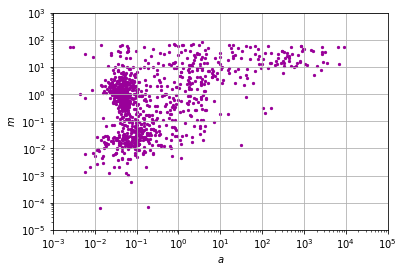

In [13]:
m_pl = lectura(2)
a    = lectura(14)

fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(a,m_pl, color = c1, s = 5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(10**-3,10**5)
ax.set_ylim(10**-5,10**3);

ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$m$');

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


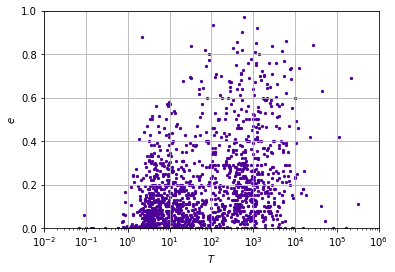

In [14]:
"""Otro ejemplo, si quisieramos hacer un plot de exc vs T:
"""
T      = lectura(11)
exc    = lectura(17)

fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(T,exc, color = c2, s = 5)

ax.set_xscale('log')

ax.set_xlim(10**-2,10**6)
ax.set_ylim(0,1);

ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$e$');

In [15]:
"""Datos que podrían servirnos"""

# Datos del planeta

name                 = lectura(0)
# planet_mass          = lectura(2)
semi_major_axis      = lectura(14)
# eccentricity         = lectura(17)
# inclination          = lectura(20) 
# omega                = lectura(26)

# Datos de la estrella
star_name            = lectura(68)
# star_mass            = lectura(82)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [16]:
NN = len(star_name)
Estrella = b'HR 8799'

for i in range(0,NN):
    if star_name[i] == Estrella:
        print('Nombre del planeta ', name[i])
        # print('Masa ', planet_mass[i])
        print('Semieje mayor ', semi_major_axis[i])
        # print('Excentricidad ', eccentricity[i])
        # print('Inclinación ', inclination[i])
        # print('omega ', omega[i])
        # print('Masa de la estrella ', star_mass[i])
        print('')

Nombre del planeta  b'HR 8799 b'
Semieje mayor  68.0

Nombre del planeta  b'HR 8799 c'
Semieje mayor  42.9

Nombre del planeta  b'HR 8799 d'
Semieje mayor  27.0

Nombre del planeta  b'HR 8799 e'
Semieje mayor  16.4



In [17]:
Numero_exo  = [1,2,3,4]
Semieje_exo = [16.4,27.0,42.9,68.0]

In [18]:
"""Calculando el ajuste de la recta por mínimos cuadrados"""

n = len(Semieje_exo)
i = 0
X, Y, XY, X2 = 0., 0., 0., 0.

for i in range(0,n):
    
    x = Numero_exo[i]
    y = np.log(Semieje_exo[i])
    
    X = X + x      # Suma de las x
    Y = Y + y      # Suma de las y
    XY = XY + x*y  # Suma de x*y
    X2 = X2 + x**2 # Suma de x^2

m = (n*XY - X*Y)/(n*X2 - X**2)    # Valor de la pendiente
b = ((X2*Y)-(XY*X))/(n*X2 - X**2) # Valor de la ordenada al origen

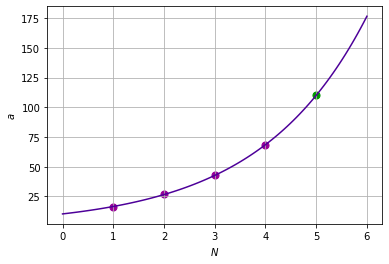

In [19]:
B = np.exp(b)
D = np.exp(m)

Numero_ajuste = np.linspace(0,n+2,100)
Semieje_ajuste = B * D**(Numero_ajuste)

fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(Numero_exo,Semieje_exo, color = c1, s = 50)
ax.plot(Numero_ajuste,Semieje_ajuste, color = c2)
ax.scatter(5, 110, color = c3, s = 50)

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$a$');